In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import scipy
from scipy.integrate import odeint
import time

In [63]:
### Define constants:
G = 6.67408 * 10**(-11)      # m**3 / (kg * s**2)     [Gravitational constant]
T_Mercury = 7.603 * 10**6    # seconds                [seconds per Mercury year]
T_Venus = 1.944 * 10**7      # seconds                [seconds per Venus year]
T_Earth = 3.154 * 10**7      # seconds                [seconds per Earth year]
T_Mars = 5.936 * 10**7       # seconds                [seconds per Mars year]
T_Jupiter = 3.74017 * 10**8  # seconds                [seconds per Jupiter year]
T_Saturn = 9.145 * 10**8     # seconds                [seconds per Saturn year]
T_Uranus = 2.649 * 10**9     # seconds                [seconds per Uranus year]
T_Neptune = 5.203 * 10**9    # seconds                [seconds per Neptune year]

M0 = 1.989 * 10**30          # kg                     [Mass of Sun]
R0 = 695500000               # m                      [Radius of Sun]

M1 = 3.3 * 10**23            # kg                     [Mass of Mercury]
R1 = 2439000                 # m                      [Radius of Mercury]
D1 = 5.79 * 10**10           # m                      [Orbital distance Mercury-Sun]
V1 = np.sqrt(G*M0/D1)        # m                      [Orbital velocity of Mercury]

M2 = 4.87 * 10**24           # kg                     [Mass of Venus]
R2 = 6052000                 # m                      [Radius of Venus]
D2 = 1.082 * 10**11          # m                      [Orbital distance Venus-Sun]
V2 = np.sqrt(G*M0/D2)        # m                      [Orbital velocity of Venus]

M3 = 5.972 * 10**24          # kg                     [Mass of Earth]
R3 = 6378100                 # m                      [Radius of Earth]
D3 = 1.496 * 10**11          # m                      [Orbital distance Earth-Sun]
V3 = np.sqrt(G*M0/D3)        # m                      [Orbital velocity of Earth]

M4 = 6.42 * 10**23           # kg                     [Mass of Mars]
R4 = 3397000                 # m                      [Radius of Mars]
D4 = 2.279 * 10**11          # m                      [Orbital distance Mars-Sun]
V4 = np.sqrt(G*M0/D4)        # m                      [Orbital velocity of Mars]

M5 = 1.898 * 10**27          # kg                     [Mass of Jupiter]
R5 = 69911000                # m                      [Radius of Jupiter]
D5 = 7.786 * 10**11          # m                      [Orbital distance Jupiter-Sun]
V5 = np.sqrt(G*M0/D5)        # m                      [Orbital velocity of Jupiter]

M6 = 5.69 * 10**26           # kg                     [Mass of Saturn]
R6 = 60268000                # m                      [Radius of Saturn]
D6 = 1.433 * 10**12          # m                      [Orbital distance Saturn-Sun]
V6 = np.sqrt(G*M0/D6)        # m                      [Orbital velocity of Saturn]

M7 = 8.68 * 10**25           # kg                     [Mass of Uranus]
R7 = 25559000                # m                      [Radius of Uranus]
D7 = 2.873 * 10**12          # m                      [Orbital distance Uranus-Sun]
V7 = np.sqrt(G*M0/D7)        # m                      [Orbital velocity of Uranus]

M8 = 1.03 * 10**26           # kg                     [Mass of Neptune]
R8 = 24764000                # m                      [Radius of Neptune]
D8 = 4.495 * 10**12          # m                      [Orbital distance Neptune-Sun]
V8 = np.sqrt(G*M0/D8)        # m                      [Orbital velocity of Neptune]

rho = 2000                   # kg / m**3              [Density of Asteroid]
R = 637810                   # m                      [Radius of Asteroid]
Vol = (4/3)*np.pi*(R**3)     # m**3                   [Volume of Asteroid]
M = rho * Vol                # kg                     [Mass of Asteroid]
D = 1.496 * 10**11           # m                      [Orbital distance Asteroid-Sun]
V = np.sqrt(G*M0/D)          # m                      [Orbital velocity of Asteroid]

print('mass of asteroid: {}'.format(M))             # [print mass of asteroid for reference]
Mass = np.array([M0, M1, M2, M3, M4, M5, M6, M7, M8]) # [Mass array for entire solar system]
planets = np.array(['Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']) # [planet array]
n = len(Mass)

mass of asteroid: 2.1736648238752572e+21


In [64]:
########     ENTIRE SOLAR SYSTEM SIMULATION GENERALIZED TO n OBJECTS

N = 1001
t3 = np.linspace(0, T_Earth, N)
t5 = np.linspace(0, T_Jupiter, N)

y_arr = np.array([             0.0,               0.0,              0.0,              0.0,
                  D1*np.cos(np.pi), -V1*np.sin(np.pi), D1*np.sin(np.pi), V1*np.cos(np.pi),
                  D2*np.cos(np.pi), -V2*np.sin(np.pi), D2*np.sin(np.pi), V2*np.cos(np.pi),
                  D3*np.cos(np.pi), -V3*np.sin(np.pi), D3*np.sin(np.pi), V3*np.cos(np.pi),
                  D4*np.cos(np.pi), -V4*np.sin(np.pi), D4*np.sin(np.pi), V4*np.cos(np.pi),
                  D5*np.cos(np.pi), -V5*np.sin(np.pi), D5*np.sin(np.pi), V5*np.cos(np.pi),
                  D6*np.cos(np.pi), -V6*np.sin(np.pi), D6*np.sin(np.pi), V6*np.cos(np.pi),
                  D7*np.cos(np.pi), -V7*np.sin(np.pi), D7*np.sin(np.pi), V7*np.cos(np.pi),
                  D8*np.cos(np.pi), -V8*np.sin(np.pi), D8*np.sin(np.pi), V8*np.cos(np.pi)])

In [67]:
### Attempt orbits of all 8 planets and Sun:
def genOrbitalMotion(y_arr, t):
    X = np.zeros(n)
    Y = np.zeros(n)
    ans_arr = np.zeros_like(y_arr)
    
    X = y_arr[0 : : 4]                                 # assign x position array
    Y = y_arr[2 : : 4]                                 # assign y position array
    Ax = np.zeros(n)                                   # acceleration in x direction
    Ay = np.zeros(n)                                   # acceleration in y direction
    
    ans_arr[0 : : 4] = y_arr[1 : : 4]                  # assign Vx
    ans_arr[2 : : 4] = y_arr[3 : : 4]                  # assign Vy
    
    for i in range(n):
        sumx, sumy = 0, 0
        for j in range(n):
            if i == j:
                continue
            R = np.sqrt((X[i] - X[j])**2 + (Y[i] - Y[j])**2)
            sumx += -(G*Mass[j]*(X[i] - X[j])) / (R**3)
            sumy += -(G*Mass[j]*(Y[i] - Y[j])) / (R**3)
        Ax[i], Ay[i] = sumx, sumy
    
    ans_arr[1 : : 4] = Ax
    ans_arr[3 : : 4] = Ay
    return np.array(ans_arr)

def orbitalMotion(y_arr, t):
    ans_arr = odeint(genOrbitalMotion, y_arr, t)
    return np.array(ans_arr)

In [68]:
Period_Jupiter = orbitalMotion(y_arr, t5)

In [69]:
'''
plt.plot(Period_Jupiter[:,0],  Period_Jupiter[:,2],  'ro', color='y', label='Sun')
plt.plot(Period_Jupiter[:,4],  Period_Jupiter[:,6],  'ro', color='c', label='Mercury')
plt.plot(Period_Jupiter[:,8],  Period_Jupiter[:,10], 'ro', color='g', label='Venus')
plt.plot(Period_Jupiter[:,12], Period_Jupiter[:,14], 'ro', color='b', label='Earth')
plt.plot(Period_Jupiter[:,16], Period_Jupiter[:,18], 'ro', color='r', label='Mars')
plt.plot(Period_Jupiter[:,20], Period_Jupiter[:,22], 'ro', color='m', label='Jupiter')
plt.plot(Period_Jupiter[:,24], Period_Jupiter[:,26], 'ro', color='k', label='Saturn')
plt.plot(Period_Jupiter[:,28], Period_Jupiter[:,30], 'ro', color='c', label='Uranus')
plt.plot(Period_Jupiter[:,32], Period_Jupiter[:,34], 'ro', color='g', label='Neptune')

plt.title('Solar System, 1 Jupiter Period')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axes().set_aspect('equal', 'datalim')
plt.show()
'''

"\nplt.plot(Period_Jupiter[:,0],  Period_Jupiter[:,2],  'ro', color='y', label='Sun')\nplt.plot(Period_Jupiter[:,4],  Period_Jupiter[:,6],  'ro', color='c', label='Mercury')\nplt.plot(Period_Jupiter[:,8],  Period_Jupiter[:,10], 'ro', color='g', label='Venus')\nplt.plot(Period_Jupiter[:,12], Period_Jupiter[:,14], 'ro', color='b', label='Earth')\nplt.plot(Period_Jupiter[:,16], Period_Jupiter[:,18], 'ro', color='r', label='Mars')\nplt.plot(Period_Jupiter[:,20], Period_Jupiter[:,22], 'ro', color='m', label='Jupiter')\nplt.plot(Period_Jupiter[:,24], Period_Jupiter[:,26], 'ro', color='k', label='Saturn')\nplt.plot(Period_Jupiter[:,28], Period_Jupiter[:,30], 'ro', color='c', label='Uranus')\nplt.plot(Period_Jupiter[:,32], Period_Jupiter[:,34], 'ro', color='g', label='Neptune')\n\nplt.title('Solar System, 1 Jupiter Period')\nplt.xlabel('x [m]')\nplt.ylabel('y [m]')\nplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)\nplt.axes().set_aspect('equal', 'datalim')\nplt.show()\n"

In [70]:
#### create save files for video

def create_save_files():
    filenames = []
    for t in range(N):
        filenames.append('Image_{}.png'.format(t))
    return np.array(filenames)

#filenames = create_save_files()

In [71]:
######  Write data to file

def write_to_file():
    for t in range(N):
        plt.plot(Period_Jupiter[t,0],  Period_Jupiter[t,2],  'ro', color='y', label='Sun')
        plt.plot(Period_Jupiter[t,4],  Period_Jupiter[t,6],  'ro', color='c', label='Mercury')
        plt.plot(Period_Jupiter[t,8],  Period_Jupiter[t,10], 'ro', color='g', label='Venus')
        plt.plot(Period_Jupiter[t,12], Period_Jupiter[t,14], 'ro', color='b', label='Earth')
        plt.plot(Period_Jupiter[t,16], Period_Jupiter[t,18], 'ro', color='r', label='Mars')
        plt.plot(Period_Jupiter[t,20], Period_Jupiter[t,22], 'ro', color='m', label='Jupiter')
        plt.plot(Period_Jupiter[t,24], Period_Jupiter[t,26], 'ro', color='k', label='Saturn')
        plt.plot(Period_Jupiter[t,28], Period_Jupiter[t,30], 'ro', color='c', label='Uranus')
        plt.plot(Period_Jupiter[t,32], Period_Jupiter[t,34], 'ro', color='g', label='Neptune')
        
        plt.title('Solar System, 1 Jupiter Period')
        plt.xlabel('x [m]')
        plt.ylabel('y [m]')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.axes().set_aspect('equal', 'datalim')
        
        plt.savefig(filenames[t])
        plt.clf()

#write_to_file()

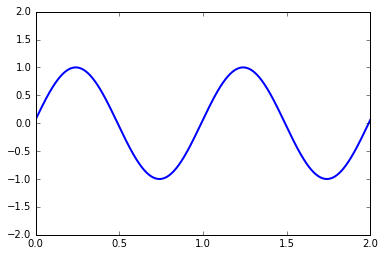

In [72]:
#####  code for mp4 creation adapted from:  http://josephrenaud.com/post-drop/2016/data-animation-with-python
#####  WORKS CORRECTLY

import os, sys

ff_path = os.path.join('C:/', 'Program Files/','ImageMagick-7.0.3-Q16', 'ffmpeg.exe')
plt.rcParams['animation.ffmpeg_path'] = ff_path
if ff_path not in sys.path: sys.path.append(ff_path)

imgk_path = os.path.join('C:/', 'Program Files/', 'ImageMagick-7.0.3-Q16', 'convert.exe')
plt.rcParams['animation.convert_path'] = imgk_path
if ff_path not in sys.path: sys.path.append(imgk_path)

fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)
ax.set_xlabel('')

def init():
    line.set_data([], [])
    return line,

def animate(time):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * time))
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                           frames=200, interval=20, blit=True)

FFwriter = animation.FFMpegWriter()

anim.save(os.path.join('C:/', 'Users/', 'Dito/', 'Documents/', 'UPITT/', 'Fall 2016/', 'Physics 1321/', 'Destabilization',
                       'basic_animation.mp4'), writer = FFwriter, fps=30, extra_args=['-vcodec', 'libx264'])

#anim.save(os.path.join('C:/', 'Users/', 'Dito/', 'Documents','basic_animation.gif'), writer='ImageMagick-7.0.3-Q16', fps=30)

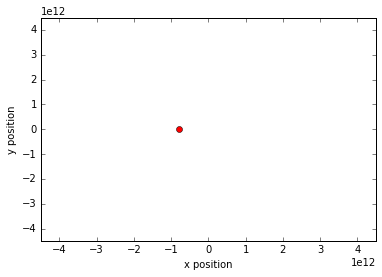

In [75]:
#####  now try to adapt above code for creation of animation of solar system data NOT YET COMPLETE

import os, sys

ff_path = os.path.join('C:/', 'Program Files/','ImageMagick-7.0.3-Q16', 'ffmpeg.exe')
plt.rcParams['animation.ffmpeg_path'] = ff_path
if ff_path not in sys.path: sys.path.append(ff_path)

imgk_path = os.path.join('C:/', 'Program Files/', 'ImageMagick-7.0.3-Q16', 'convert.exe')
plt.rcParams['animation.convert_path'] = imgk_path
if ff_path not in sys.path: sys.path.append(imgk_path)

fig = plt.figure()
ax = plt.axes(xlim=(-D8, D8), ylim=(-D8, D8))
data, = ax.plot([], [], 'ro')
ax.set_xlabel('x position')
ax.set_ylabel('y position')

def init():
    data.set_data([], [])
    return data,

def animate(time):
    x = Period_Jupiter[time, 20]
    y = Period_Jupiter[time, 22]
    data.set_data(x, y)
    return data,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=1000, interval=20, blit=True)

FFwriter = animation.FFMpegWriter()

anim.save(os.path.join('C:/', 'Users/', 'Dito/', 'Documents/', 'UPITT/', 'Fall 2016/', 'Physics 1321/', 'Destabilization',
                       'basic_animation.mp4'), writer = FFwriter, fps=60, extra_args=['-vcodec', 'libx264'])

#anim.save(os.path.join('C:/', 'Users/', 'Dito/', 'Documents','basic_animation.gif'), writer='ImageMagick-7.0.3-Q16', fps=30)

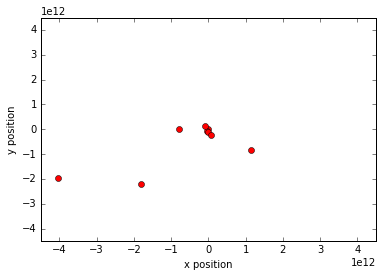

In [76]:
#####  now try to adapt above code for creation of animation of solar system data NOT YET COMPLETE

import os, sys

ff_path = os.path.join('C:/', 'Program Files/','ImageMagick-7.0.3-Q16', 'ffmpeg.exe')
plt.rcParams['animation.ffmpeg_path'] = ff_path
if ff_path not in sys.path: sys.path.append(ff_path)

imgk_path = os.path.join('C:/', 'Program Files/', 'ImageMagick-7.0.3-Q16', 'convert.exe')
plt.rcParams['animation.convert_path'] = imgk_path
if ff_path not in sys.path: sys.path.append(imgk_path)

fig = plt.figure()
ax = plt.axes(xlim=(-D8, D8), ylim=(-D8, D8))
data, = ax.plot([], [], 'ro')
ax.set_xlabel('x position')
ax.set_ylabel('y position')

def init():
    data.set_data([], [])
    return data,

def animate(time):
    x = Period_Jupiter[time, 0::4]
    y = Period_Jupiter[time, 2::4]
    data.set_data(x, y)
    return data,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=1000, interval=20, blit=True)

FFwriter = animation.FFMpegWriter()

anim.save(os.path.join('C:/', 'Users/', 'Dito/', 'Documents/', 'UPITT/', 'Fall 2016/', 'Physics 1321/', 'Destabilization',
                       'basic_animation.mp4'), writer = FFwriter, fps=60, extra_args=['-vcodec', 'libx264'])

#anim.save(os.path.join('C:/', 'Users/', 'Dito/', 'Documents','basic_animation.gif'), writer='ImageMagick-7.0.3-Q16', fps=30)